In [1]:
# Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv("Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.shape

(10000, 14)

In [5]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
# hecking datatypes and null values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# Statistical Summary of the dataset

data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
# Get unique count for each variable

data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

 **we will not require the first 2 attributes as the are specific to a customer. It is borderline with the surname as this would result to profiling so we can exclude all three features together.**

In [9]:
# Drop irrelevant features 

data = data.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [10]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
data.shape

(10000, 11)

# Exploratory Data Analysis

In [12]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

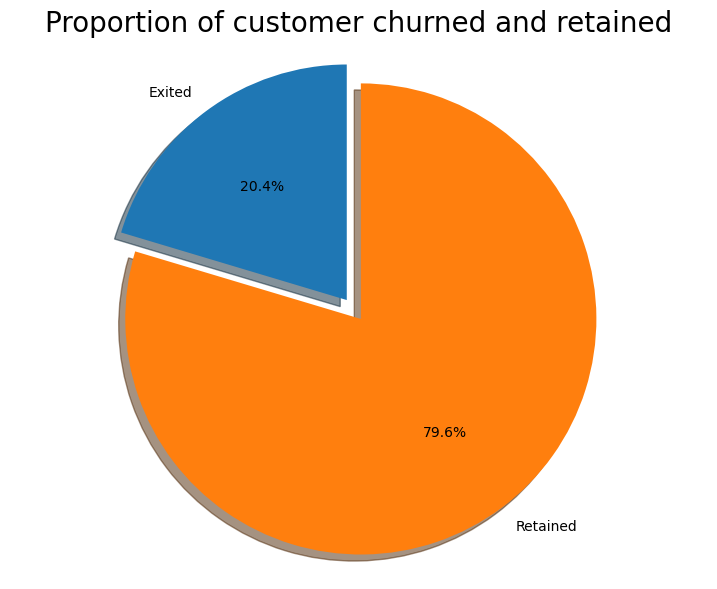

In [13]:
labels = 'Exited', 'Retained'
sizes = [data.Exited[data['Exited']==1].count(), data.Exited[data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(9, 7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

**From above pie chart,we can see that around 20% of customers had churned i.e exited and 80% retained.This shows that our dataset is a little imbalanced so we have to predict customer churn with a good accuracy as this 20% customers are of more interest to the bank.**

In [14]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
data['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

## *Bi - variate Analysis*

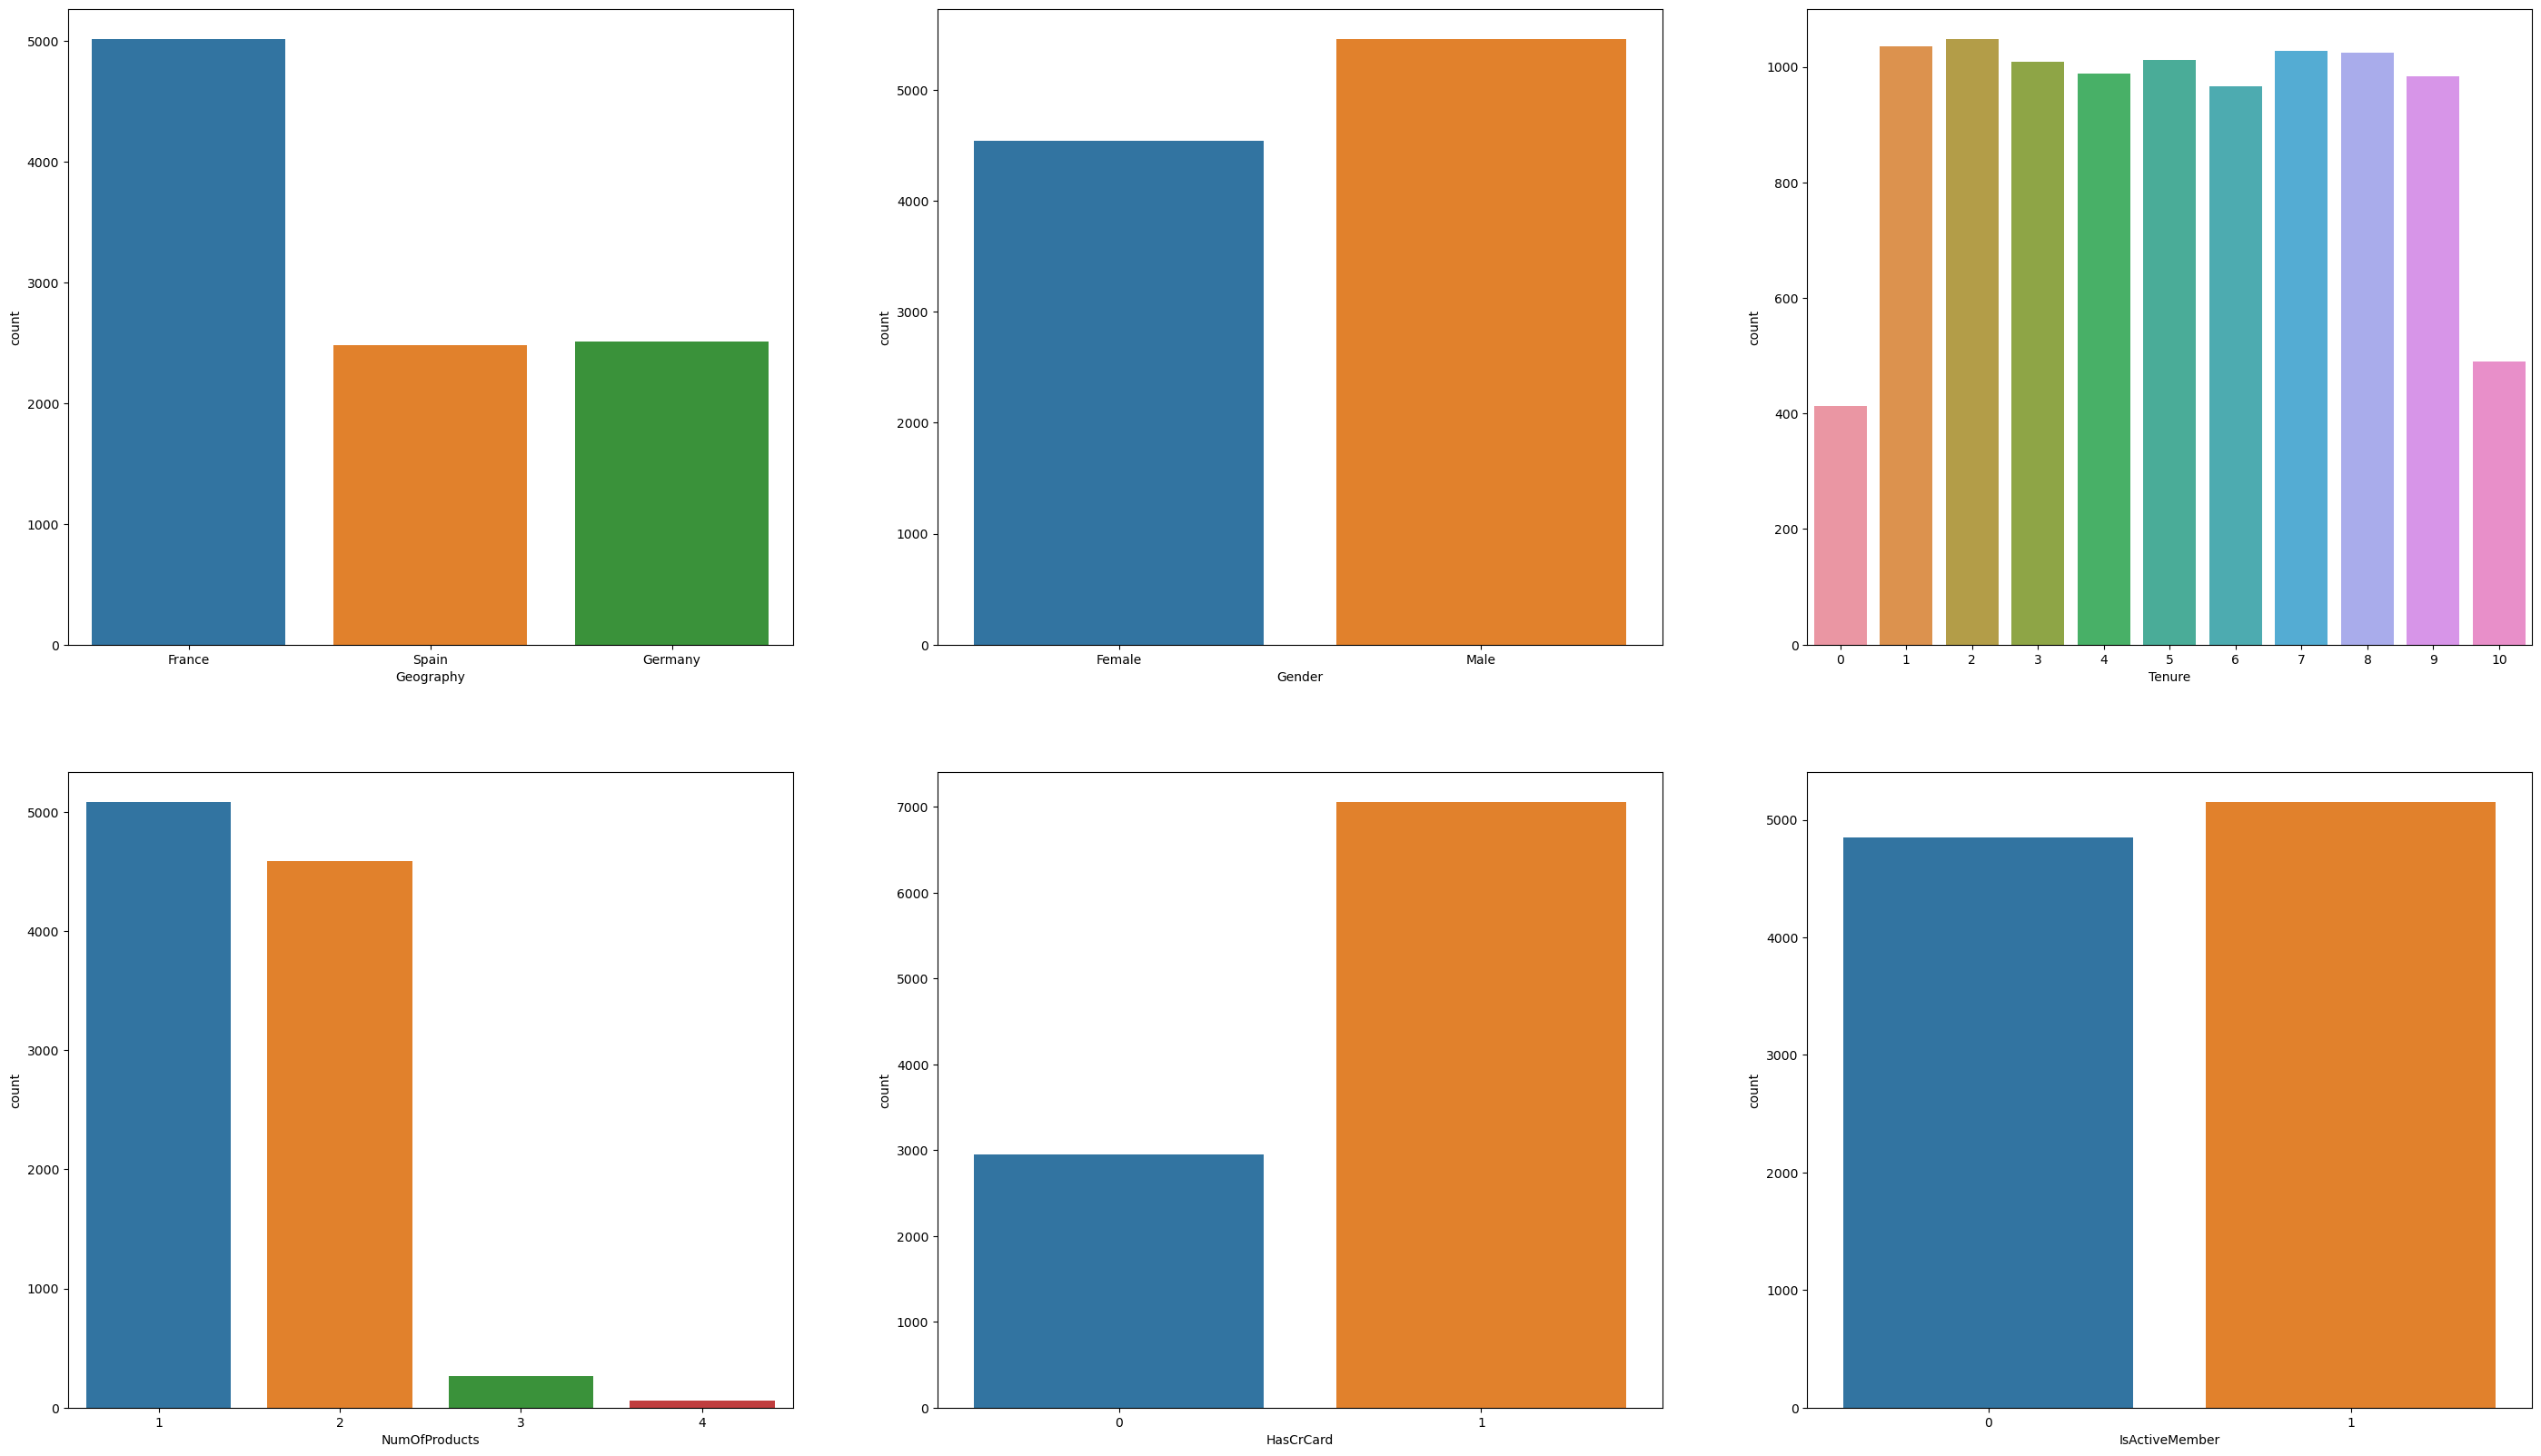

In [16]:
# Count column plots to map the dependence of 'Exited' column on categorical features

fig, ax = plt.subplots(2, 3, figsize=(35, 20))

sns.countplot(x='Geography', data=data, ax=ax[0][0])
sns.countplot(x='Gender', data=data, ax=ax[0][1])
sns.countplot(x='Tenure', data=data, ax=ax[0][2])
sns.countplot(x='NumOfProducts', data=data, ax=ax[1][0])
sns.countplot(x='HasCrCard', data=data, ax=ax[1][1])
sns.countplot(x='IsActiveMember', data=data, ax=ax[1][2])

plt.show()



1.   *Total number of customers who retained is highest from France and those who exited are highest from Germany,which means the bank needs to focus more on customers from Germany followed by France so that they don't churn.*

2.   *The proportion of female customers churning is greater than that of male customers.*

3. *Customers with tenure period with bank either too less or too more tends to churn more.*

4. *Customer with 3 or 4 products are higher chances to Churn*

5. *Suprisingly,coustomers who had credit card churned more*

6. *As usual,the inactive members churned more*




<Axes: xlabel='Balance', ylabel='Density'>

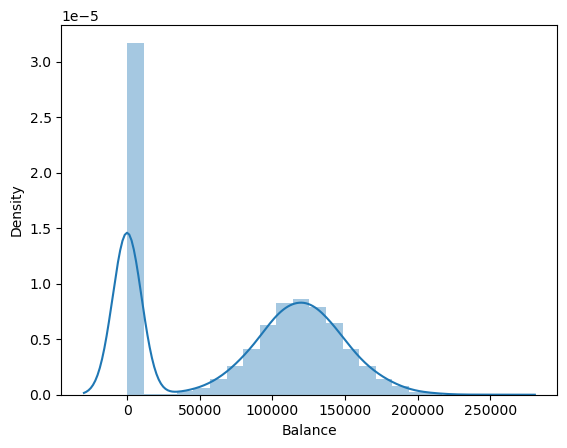

In [17]:
sns.distplot(data['Balance'])

*The above graph shows that the "Balance" column is not normalized which indicates that in later stage we need to normalize the data before training.*

<Axes: >

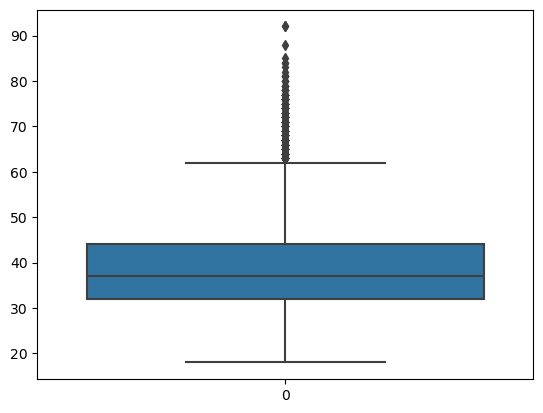

In [18]:
sns.boxplot(data['Age'], orient = 'v')

In [19]:
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance', 'EstimatedSalary']

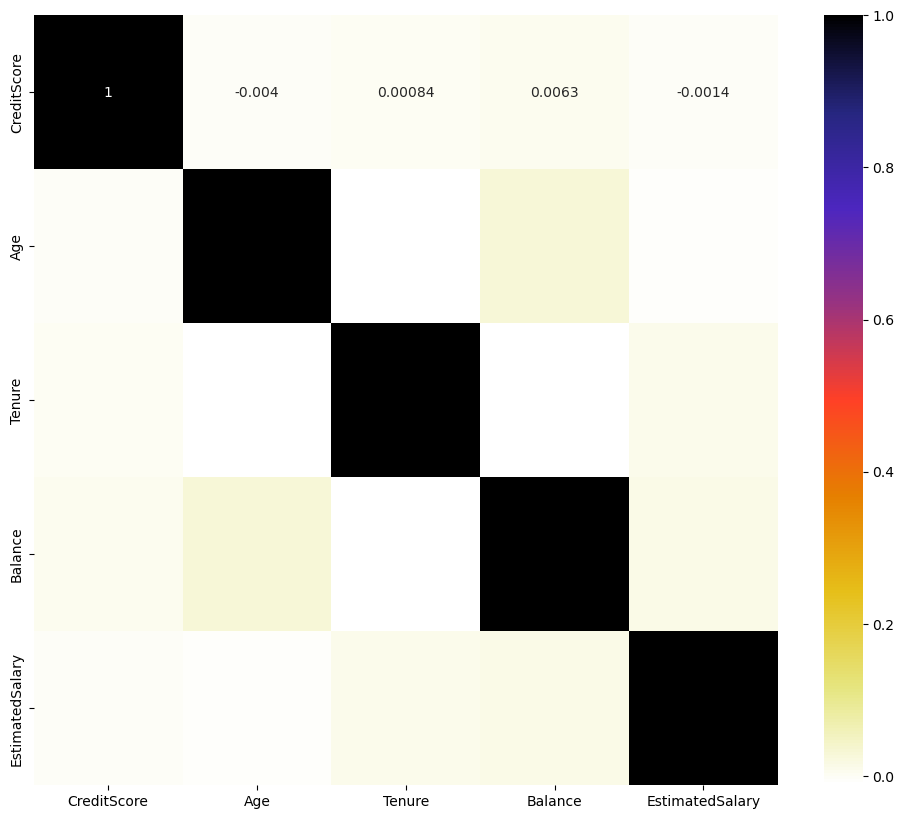

In [20]:
 #Displaying Correlation between varaibles using heatmap

plt.figure(figsize=(12,10))

cor = data[continuous_vars].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

*From the above graph we can observe that there is no correlation within the features, so there is no chance of multicollinearity and we didn't need to drop any feature.*

# Data Preprocessing

**Handling Categorical Variables**

In [21]:
# One Hot Encoding

encoded_data = pd.get_dummies(data=data, columns=['Gender','Geography'])
encoded_data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Gender_Female',
       'Gender_Male', 'Geography_France', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')

In [22]:
encoded_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,True,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,True,False,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,True,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,True,False,False,False,True


In [23]:
encoded_data.shape

(10000, 14)

In [24]:
# Split the dataset into target variables and predictors

X = encoded_data.drop('Exited',axis='columns')
y = encoded_data['Exited']

In [25]:
# Now we need to normalize our data between 0 and 1, so that there is no overflow of values during the calculations.

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

X = minmax.fit_transform(X)

In [26]:
# Split the dataset into training and testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 13), (2000, 13), (8000,), (2000,))

# Model Building

*Building Neural Network*

In [28]:
from keras.models import Sequential
from keras.layers import Dense

In [29]:
# creating the model
model = Sequential()

from keras.layers import Dropout

# first hidden layer
model.add(Dense(13,activation = 'relu', input_dim = 13))
#model.add(Dropout(0.1))

# second hidden layer
model.add(Dense(8, activation = 'relu'))
#model.add(Dropout(0.1))

# output layer
model.add(Dense(1,activation = 'sigmoid'))

# Compiling the NN
# binary_crossentropy loss function used when a binary output is expected
model.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['accuracy']) 

model.fit(X_train, y_train, batch_size = 20, epochs = 80)

Epoch 1/80
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7476 - loss: 0.5467
Epoch 2/80
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7972 - loss: 0.4755
Epoch 3/80
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - accuracy: 0.7983 - loss: 0.4697
Epoch 4/80
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7979 - loss: 0.4624
Epoch 5/80
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8053 - loss: 0.4538
Epoch 6/80
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.8081 - loss: 0.4453
Epoch 7/80
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 831us/step - accuracy: 0.8201 - loss: 0.4306
Epoch 8/80
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.8220 - loss: 0.4288
Epoch 9/80
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.8204 - loss: 0.4199
Epoch 10/80
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8255 - loss: 0.4104
Epoch 11/80
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8291 - loss: 0.4023
Epoch 12/80
400/400 ━━━━━━━━━━━━━━━━━━━━ 0

In [30]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8636 - loss: 0.3322


[0.3354908525943756, 0.8640000224113464]

In [31]:
# Checking the Perfrmance 

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, precision_recall_curve, auc, roc_curve
y_pred = model.predict(X_test)

# Convert probabilities into true or false - threshold = 0.5
y_pred = (y_pred > 0.5)

ann_acc = accuracy_score(y_test,y_pred)
ann_acc

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


0.864

Text(95.72222222222221, 0.5, 'Truth')

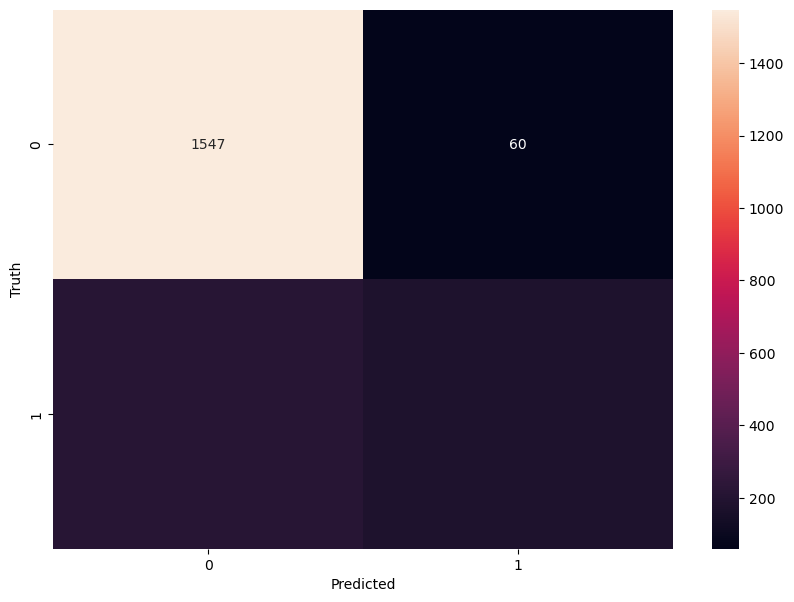

In [32]:
# Confusion Matrix

import seaborn as sn
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

*Since we already observe that the dataset is quite imbalaced so we can say that accuracy score is not a good performance measurement. We should use F1-score or AUC score to check the performance of model.*

In [33]:
f1 = f1_score(y_test, y_pred)
f1

0.5709779179810726

In [34]:
roc_auc_score(y_test, y_pred)

0.7116115721454009

[0.        0.4605598 1.       ]
[0.         0.03733665 1.        ]
[2 1 0]
0.7116115721454009
Threshold value is: 1


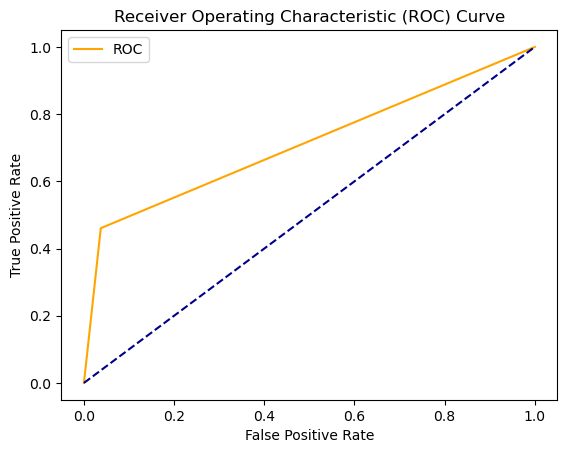

In [35]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(tpr)
print(fpr)
print(thresholds)
print(roc_auc_score(y_test, y_pred))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

***The optimal threshold value we get by using ROC-AUC curve is 1.***

*Since Area Under the Curve is 70% and F1-score is 55% which is quite low and we can clearly observe that we need to improve the model's performance, so in order to improve the performance we first need to balance the dataset first by using the SMOTE (Synthetic Minority Oversampling Technique) function and then we can implement the different models on the balanced dataset.*

# Improve and Evaluate Model Performance

In [36]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [38]:
# Now try with other models (Bagging and Boosting)

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [39]:
# Fitting random forest classifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
# Accuracy Score

rf_pred = rf.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
rf_acc

0.9026993094789705

In [41]:
# F1-score
rf_pred = rf.predict(X_test)

rf_f1 = f1_score(y_test, rf_pred)
rf_f1

0.9035469819539516

In [42]:
# AUC score

rf_auc = roc_auc_score(y_test, rf_pred)
rf_auc

0.9026993094789705

Text(95.72222222222221, 0.5, 'Truth')

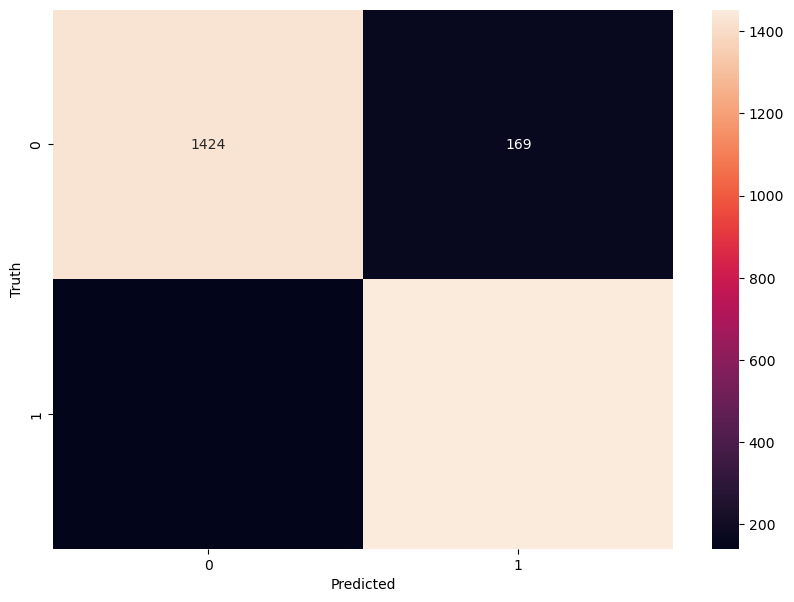

In [43]:
# Confusion Matrix

cm = confusion_matrix(y_test,rf_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [44]:
# Fitting XGB Classifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [45]:
# Accuracy Score

xgb_pred = rf.predict(X_test)

xgb_acc = accuracy_score(y_test, xgb_pred)
xgb_acc

0.9026993094789705

In [46]:
# F1-score

xgb_pred = rf.predict(X_test)

xgb_f1 = f1_score(y_test, xgb_pred)
xgb_f1

0.9035469819539516

In [47]:
# AUC Score

xgb_auc = roc_auc_score(y_test, xgb_pred)
xgb_auc

0.9026993094789705

Text(95.72222222222221, 0.5, 'Truth')

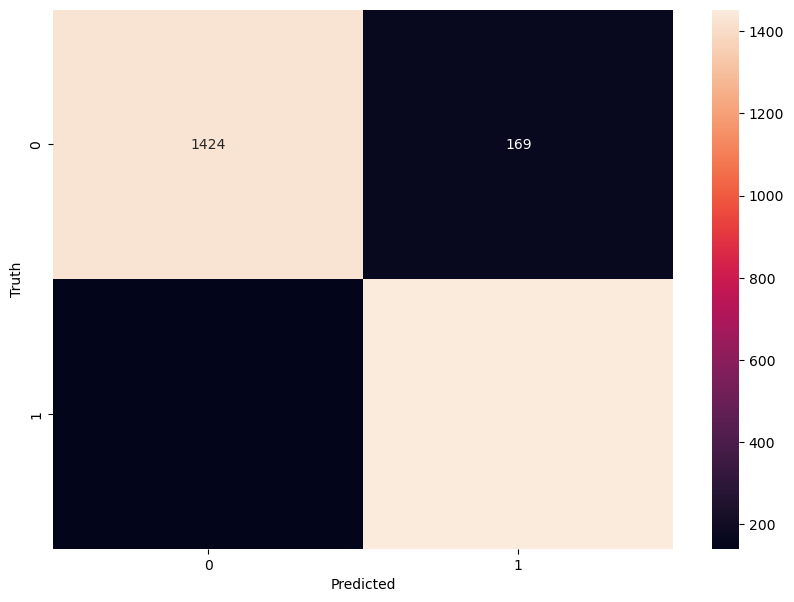

In [48]:
# Confusion Matrix

cm = confusion_matrix(y_test,xgb_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [49]:
# creating the model
model = Sequential()

from keras.layers import Dropout

# first hidden layer
model.add(Dense(13,activation = 'relu', input_dim = 13))
#model.add(Dropout(0.1))

# second hidden layer
model.add(Dense(8, activation = 'relu'))
#model.add(Dropout(0.1))

# output layer
model.add(Dense(1,activation = 'sigmoid'))

# Compiling the NN
# binary_crossentropy loss function used when a binary output is expected
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['AUC']) 

model.fit(X_train, y_train, batch_size = 20, epochs = 100)

Epoch 1/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.6646 - loss: 0.6600
Epoch 2/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7515 - loss: 0.5926
Epoch 3/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.7849 - loss: 0.5624
Epoch 4/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8046 - loss: 0.5425
Epoch 5/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8216 - loss: 0.5250
Epoch 6/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8344 - loss: 0.5060
Epoch 7/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step - AUC: 0.8464 - loss: 0.4894
Epoch 8/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step - AUC: 0.8529 - loss: 0.4766
Epoch 9/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8492 - loss: 0.4820
Epoch 10/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 976us/step - AUC: 0.8591 - loss: 0.4668
Epoch 11/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8587 - loss: 0.4678
Epoch 12/100
637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.8562 - loss: 0.4707
Epoch 1

In [50]:
model.evaluate(X_test, y_test)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - AUC: 0.8773 - loss: 0.4391


[0.4251656234264374, 0.8857247233390808]

In [51]:
ann_pred = model.predict(X_test)

# Convert probabilities into true or false - threshold = 0.5
#ann_pred = (ann_pred > 0.5)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [52]:
ann_pred

array([[0.03868756],
       [0.42017847],
       [0.8535211 ],
       ...,
       [0.872124  ],
       [0.23265433],
       [0.91157925]], dtype=float32)

In [53]:
y_predict = []
for element in ann_pred:
    if element > 0.5:
        y_predict.append(1)
    else:
        y_predict.append(0)

In [54]:
y_pred[:10]

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [55]:
ann_accuracy = accuracy_score(y_test, y_predict)
ann_accuracy

0.7997489014438167

In [56]:
ann_f1 = f1_score(y_test, y_predict)
ann_f1

0.7924528301886793

In [57]:
ann_auc = roc_auc_score(y_predict, y_test)
ann_auc

0.8012379683221094

Text(95.72222222222221, 0.5, 'Truth')

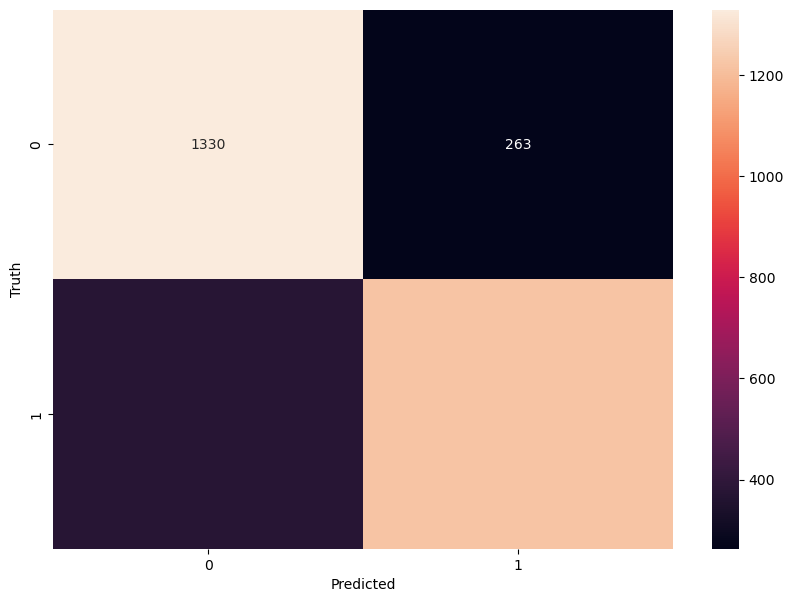

In [58]:
# Confusion Matrix

cm = confusion_matrix(y_test,y_predict)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

***Now we can clearly observe that after balancing the dataset the model's performance improve a lot and thus this time we can get a better F1 score and AUC score.***

## Comparing the result of all 3 Model

In [59]:
#Getting f1-score and AUC score for each model

model_data = pd.DataFrame({'Classifiers' : ['RandomForestClassifier', 'XGBoost Classifier', 'ArtificialNeuralNetwork'],
                        'F1-Score %' : [rf_f1,xgb_f1,ann_f1],
                        'AUC Score %': [rf_auc, xgb_auc, ann_auc],
                        'Accuracy SCore %': [rf_acc, xgb_acc, ann_accuracy]})

In [60]:
model_data['F1-Score %'] = model_data['F1-Score %'].apply(lambda x : round((x*100),2))
model_data['AUC Score %'] = model_data['AUC Score %'].apply(lambda x : round((x*100),2))
model_data['Accuracy SCore %'] = model_data['Accuracy SCore %'].apply(lambda x : round((x*100),2))

In [61]:
model_data

,Classifiers,F1-Score %,AUC Score %,Accuracy SCore %
0,RandomForestClassifier,90.35,90.27,90.27
1,XGBoost Classifier,90.35,90.27,90.27
2,ArtificialNeuralNetwork,79.25,80.12,79.97


*From the above result we can conclude that Ensemble Learning model i.e. Random Forest Classifier & XGBoost Classifier works well in comparison with Neural Network Model after balancing the dataset.*

# Conclusions and Key takeaways



*   *From the above result we can conclude that by using the Bagging and Boosting Model we can improve the performance.*

*  *For further improvement we can use Random oversampling method and we can also tune the hyper parameters of bagging and boosting model.*

## Some Recoomendation for Bank Management



*   *Bank should focus more on female customers as they have higher chnaces of churn.*

*  *Bank should introduce some policies or benefits so that more no. of customers remain active as non-active members have higher chances of churning.*

*  *Surprisingly the cutomers who is having credit card churned more which indicates that bank management are unable to introduce any beneficiary for these customers, so the bank must look on this issue.*

